In [30]:
import numpy as np
import math
import itertools
import sys
import matplotlib.pyplot as plt
import copy

from mpl_toolkits import mplot3d
from ripser import ripser
from persim import plot_diagrams
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

%load_ext autoreload
%autoreload 2
import cup_quasi_periodic_detection as cqpd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
sim0_pos = np.array([[1,0,-1],
                    [1,0,1],
                    [0.5,0,0],
                    [np.cos(2*np.pi/3), np.sin(2*np.pi/3), -1],
                    [np.cos(2*np.pi/3), np.sin(2*np.pi/3), 1],
                    [0.5*np.cos(2*np.pi/3), 0.5*np.sin(2*np.pi/3), 0],
                    [np.cos(4*np.pi/3), np.sin(4*np.pi/3), -1],
                    [np.cos(4*np.pi/3), np.sin(4*np.pi/3), 1],
                    [0.5*np.cos(4*np.pi/3), 0.5*np.sin(4*np.pi/3), 0]
                    ], dtype=float)

torus = {}
torus['0'] = np.array(np.arange(0,9), dtype=int)

In [32]:
torus['1'] = np.array([[0,1],[1,2],[0,2],
              [3,4],[4,5],[3,5],
              [6,7],[7,8],[6,8],
              [0,3],[3,6],[0,6],
              [1,4],[4,7],[1,7],
              [2,5],[5,8],[2,8],
              [2,4],[1,3],[0,5],
              [5,7],[4,6],[3,8],
              [1,8],[0,7],[2,6]], dtype=int)

In [33]:
torus['2'] = np.array([[0,1,3],[1,3,4],[1,2,4],[2,4,5],[0,2,5],[0,3,5],
                      [4,6,7],[3,4,6],[4,5,7],[5,7,8],[3,5,8],[3,6,8],
                      [0,6,7],[0,1,7],[1,7,8],[1,2,8],[2,6,8],[0,2,6],
                      [0,1,2],[2,5,8]], dtype=int)

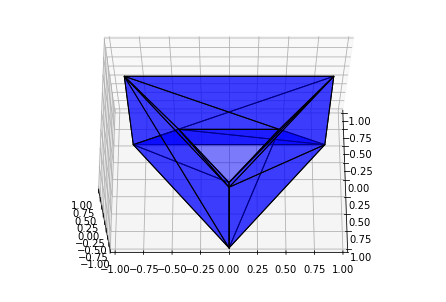

In [34]:
fig = plt.figure()
ax = Axes3D(fig)

verts = [sim0_pos[torus['2'][i]] for i in range(len(torus['2']))]

collection = Poly3DCollection(verts)
collection.set_facecolor([0,0,1,0.5])
collection.set_edgecolor([0,0,0,1])

ax.add_collection3d(collection)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
# plt.show()

# rotate the axes and update
ax.view_init(65, 0)

In [35]:
d0 = cqpd.delta_0(torus['0'], torus['1'])

In [36]:
d1 = cqpd.delta_1(torus['1'], torus['2'])

In [8]:
R0, V0, low0 = cqpd.matrix_reduction(d0)

[19 20 20 22 23 23 25 26 26]
cur-columns =  [7 8]
i= 7
j= 8
[19 20 20 22 23 23 25 26 25]
[[0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]]

cur-columns =  [6 8]
i= 6
j= 8
[19 20 20 22 23 23 25 26 17]
[[0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0

In [9]:
R1, V1, low1 = cqpd.matrix_reduction(d1)

[ 3  7  5  9 13 11 15 19 17  4 10 16  6 13 18  7 12 19  8 10 13 14 16 18
 15 17 19]
cur-columns =  [ 7 17 26]
i= 7
j= 17
[ 3  7  5  9 13 11 15 19 17  4 10 16  6 13 18  7 12 18  8 10 13 14 16 18
 15 17 19]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
  0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
  0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
  1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.
  0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
  1. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
  0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0

In [10]:
np.sum(R0, axis=0)

array([ 6.,  6., 12.,  6.,  6., 12.,  6.,  6.,  0.])

In [11]:
np.sum(R1, axis=0)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 2., 2., 2., 1., 0.,
       0., 2., 0., 0., 2., 0., 0., 1., 0., 0.])

In [12]:
low0

array([19, 20, 16, 22, 23, 17, 25, 26, -1])

In [13]:
low1

array([ 3,  7,  5,  9, 13, 11, 15, 19, 17,  4, 10, 16,  6, 12, 18,  0, -1,
       -1,  8, -1, -1, 14, -1, -1,  1, -1, -1])

In [14]:
cocycles_0 = []

print('H0')

for i in range(len(low0)):
    
    ii = len(torus['0'])-i-1
    
    j = low0[i]
    
    jj = len(torus['1'])-j-1
    
    if j == -1:
        print('Trancendental class = ({}, infty)'.format(torus['0'][ii]))
        print(V0[:,ii])
        
        # Just saving cocycle
        co = []
        for ind in np.where(V0[:,ii] > 0)[-1]:
            co.append(torus['0'][ind])
        cocycles_0.append(co)

    else:
        print('Pair = ({},{})'.format(torus['0'][ii], torus['1'][jj]))
        print(V0[:,ii])
        
        # Just saving cocycle
        co = []
        for ind in np.where(V0[:,ii] > 0)[-1]:
            co.append(torus['0'][ind])
        cocycles_0.append(co)

H0
Pair = (8,[7 8])
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
Pair = (7,[6 7])
[0. 0. 0. 0. 0. 0. 0. 1. 0.]
Pair = (6,[3 6])
[0. 0. 0. 0. 0. 0. 1. 0. 0.]
Pair = (5,[4 5])
[0. 0. 0. 1. 1. 1. 0. 0. 0.]
Pair = (4,[3 4])
[0. 0. 0. 0. 1. 0. 0. 0. 0.]
Pair = (3,[0 3])
[0. 0. 0. 1. 0. 0. 0. 0. 0.]
Pair = (2,[1 2])
[1. 1. 1. 0. 0. 0. 0. 0. 0.]
Pair = (1,[0 1])
[0. 1. 0. 0. 0. 0. 0. 0. 0.]
Trancendental class = (0, infty)
[1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
cocycles_1 = []

print('H1')

for i in range(len(low1)):

    ii = len(torus['1'])-i-1

    j = low1[i]
    
    jj = len(torus['2'])-j-1

    if j == -1 and np.where(low0 == i)[-1].size == 0 :
        print('Trancendental class = ({}, infty)'.format(torus['1'][ii]))
        print(V1[:,ii])
        
        # Just saving cocycle
        co = []
        for ind in np.where(V1[:,ii] > 0)[-1]:
            co.append(torus['1'][ind])
        cocycles_1.append(co)
        
    elif j == -1 and np.where(low0 == i)[-1].size > 0 :
        continue
    else:
        print('Pair = ({},{})'.format(torus['1'][ii], torus['2'][jj]))
        print('Persistence = ({},{})'.format( 9 + (ii+1), 9 + 29 + (jj+1) ))
        print('Perssitence = {}'.format( 9 + 29 + (jj+1) - 9 + (ii+1) ))
        print(V1[:,ii])
        print('')
        
        # Just saving cocycle
        co = []
        for ind in np.where(V1[:,ii] > 0)[-1]:
            co.append(torus['1'][ind])
        cocycles_1.append(co)

H1
Pair = ([2 6],[2 6 8])
Persistence = (36,55)
Perssitence = 73
[1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1.]

Pair = ([0 7],[0 6 7])
Persistence = (35,51)
Perssitence = 68
[1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0.]

Pair = ([1 8],[1 7 8])
Persistence = (34,53)
Perssitence = 69
[1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0.]

Pair = ([3 8],[3 5 8])
Persistence = (33,49)
Perssitence = 64
[0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0.]

Pair = ([4 6],[4 6 7])
Persistence = (32,45)
Perssitence = 59
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0.]

Pair = ([5 7],[4 5 7])
Persistence = (31,47)
Perssitence = 60
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0.]

Pair = ([0 5],[0 2 5])
Persistence = (30,43)
Perssitence = 55
[0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0

In [16]:
cocycle1 = np.column_stack((np.array(cocycles_1[0]), np.ones(len(cocycles_1[0]))))
cocycle2 = np.column_stack((np.array(cocycles_1[2]), np.ones(len(cocycles_1[2]))))

In [17]:
cup = cqpd.cup_product_cochains(cocycle1, cocycle2, 2)

print(cup)

[[0.0, 1.0, 8.0, 1.0], [0.0, 2.0, 4.0, 1.0], [0.0, 3.0, 4.0, 1.0], [0.0, 6.0, 7.0, 1.0], [2.0, 6.0, 7.0, 1.0]]


In [18]:
cochain = np.zeros(torus['2'].shape[0])

cup = np.array(cup)

for i in range(len(cup)):
    simplex = cup[i,2::-1]
    simplex = cup[i,0:3]

    j = np.where((torus['2'] == simplex).all(axis=1))

    cochain[j] = cup[i,3]
    
cochain = cochain[::-1]

print(cochain)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
y, index = cqpd.backwards_substitution(R1, low1, cochain)

In [20]:
y

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
index

2

In [28]:
len(torus['2'])-(2+1)

17

In [29]:
torus['2'][len(torus['2'])-(2+1)]

array([0, 2, 6])

In [23]:
R1

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [24]:
# R0

matrix ind: (0,1) -> (num_0_simplices - 1 - 0, num_1_simplices - 1 - 1)=(2-0, 2-1)= (2,1)
-> (0_simplices[2], 1_simplices[1]) = (2,[0,2]) -> diameter to obtain interval

(1,[0,1])

(0,inf)

In [25]:
# 1-dimensional pairs

